<a href="https://colab.research.google.com/github/arzoozehra/CIND820/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [40]:
url = 'https://raw.githubusercontent.com/arzoozehra/CIND820/main/data/train.csv'
train = pd.read_csv(url)
test = pd.read_csv('https://raw.githubusercontent.com/arzoozehra/CIND820/main/data/test.csv')

In [41]:
print(train.head())
print(test.head())

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  
       textID                                               text sentiment
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive
2  eee518ae67  Recession hit Veronique Branquinho, she has t

In [42]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [43]:
print('Training set contains {} rows and {} columns.'.format(train.shape[0],train.shape[1]))
print('Test set contains {} rows and {} columns'.format(test.shape[0],test.shape[1]))
print('\nTraining set contains {} row(s) with missing values.'.format(train.isna().any(axis=1).sum()))
print('Test set contains {} row(s) with missing values.'.format(test.isna().any(axis=1).sum()))

Training set contains 27481 rows and 4 columns.
Test set contains 3534 rows and 3 columns

Training set contains 1 row(s) with missing values.
Test set contains 0 row(s) with missing values.


In [44]:
train.dropna(inplace=True)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [46]:
train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


In [47]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [48]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(train)
#profile.to_notebook_iframe()

In [49]:
#neutral_text
print("Neutral tweet example  :",train[train['sentiment']=='neutral']['text'].values[0])
# Positive tweet
print("Positive Tweet example :",train[train['sentiment']=='positive']['text'].values[0])
#negative_text
print("Negative Tweet example :",train[train['sentiment']=='negative']['text'].values[0])

Neutral tweet example  :  I`d have responded, if I were going
Positive Tweet example : 2am feedings for the baby are fun when he is all smiles and coos
Negative Tweet example :  Sooo SAD I will miss you here in San Diego!!!


In [50]:
print(train['sentiment'].value_counts())
print(train['sentiment'].value_counts(normalize=True))

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64
neutral     0.404549
positive    0.312300
negative    0.283151
Name: sentiment, dtype: float64


In [51]:
test['sentiment'].value_counts(normalize=True)

neutral     0.404641
positive    0.312111
negative    0.283248
Name: sentiment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'tweets')

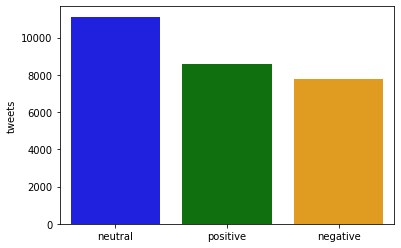

In [52]:
x = train.sentiment.value_counts()
sns.barplot(x.index, x, palette=['blue', 'green', 'orange'])
plt.gca().set_ylabel('tweets')

In [53]:
neutral = train[train['sentiment']=='neutral']
pos = train[train['sentiment']=='positive']
neg = train[train['sentiment']=='negative']

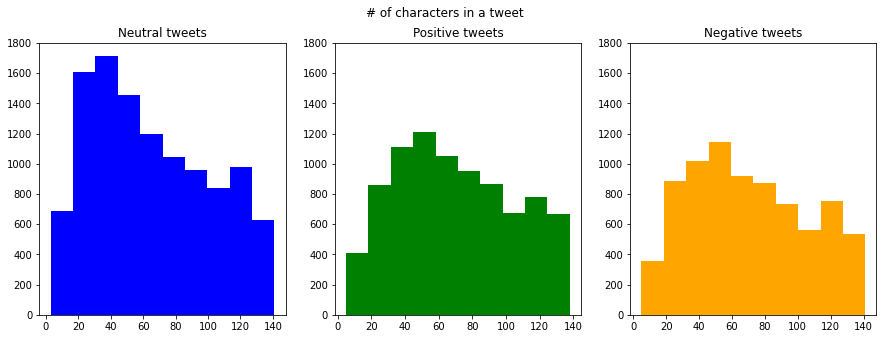

In [54]:
# number of characters, i.e. tweet length

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

tweet_len = neutral['text'].str.len()
ax1.hist(tweet_len, color='blue')
ax1.set_title('Neutral tweets')
ax1.set_ylim([0, 1800])

tweet_len = pos['text'].str.len()
ax2.hist(tweet_len, color='green')
ax2.set_title('Positive tweets')
ax2.set_ylim([0, 1800])

tweet_len = neg['text'].str.len()
ax3.hist(tweet_len, color='orange')
ax3.set_title('Negative tweets')
ax3.set_ylim([0, 1800])


fig.suptitle('# of characters in a tweet')
plt.show()


In [55]:
#fig, ax = plt.subplots()

#tweet_len = pos['text'].str.len()
#sns.distplot(tweet_len, color='red', ax = ax, hist = False)

#tweet_len = neutral['text'].str.len()
#sns.distplot(tweet_len, color='blue', ax = ax, hist = False)


#tweet_len = neg['text'].str.len()
#sns.distplot(tweet_len, color='green', ax = ax, hist = False)

#plt.show()

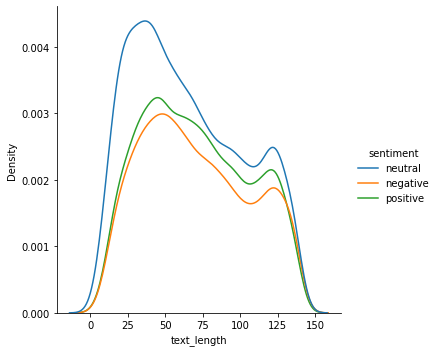

In [56]:
 # initialize data of lists.
data = {'sentiment': train['sentiment'],
        'text_length': train['text'].str.len()}
  
# Create DataFrame
data = pd.DataFrame(data)

sns.displot(data=data, x='text_length', hue = 'sentiment', kind = 'kde')

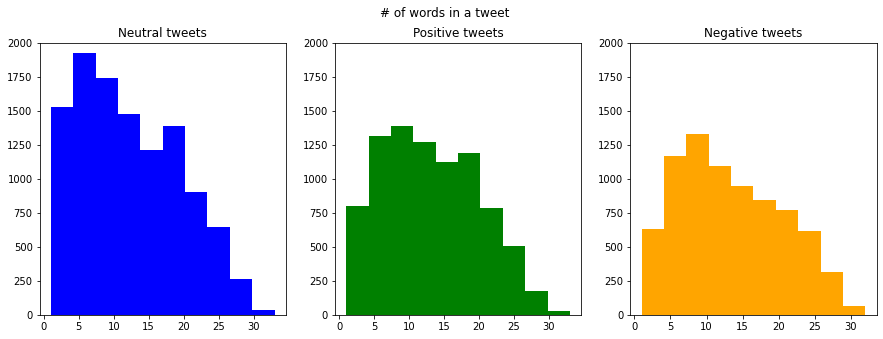

In [57]:
# number of words in a tweet

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

tweet_words = neutral['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_words, color = 'blue')
ax1.set_title('Neutral tweets')
ax1.set_ylim([0,2000])

tweet_words = pos['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_words, color = 'green')
ax2.set_title('Positive tweets')
ax2.set_ylim([0,2000])

tweet_words = neg['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_words, color = 'orange')
ax3.set_title('Negative tweets')
ax3.set_ylim([0,2000])

fig.suptitle('# of words in a tweet')
plt.show()

In [58]:
# fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))

# word = neutral['text'].str.split().apply(lambda x : [len(i) for i in x])
# sns.distplot(word.map(lambda x: np.mean(x)), ax = ax1, color='blue')
# ax1.set_title('Neutral')
# ax1.set_xlim([0,70])
# ax1.set_ylim([0,0.6])

# word = pos['text'].str.split().apply(lambda x : [len(i) for i in x])
# sns.distplot(word.map(lambda x: np.mean(x)), ax = ax2, color = 'green')
# ax2.set_title('Positive')
# ax2.set_xlim([0,70])
# ax2.set_ylim([0,0.6])

# word = neg['text'].str.split().apply(lambda x : [len(i) for i in x])
# sns.distplot(word.map(lambda x: np.mean(x)), ax = ax3, color = 'orange')
# ax3.set_title('Negative')
# ax3.set_xlim([0,70])
# ax3.set_ylim([0,0.6])


# fig.suptitle('Average word length in each tweet')

**Normalizing text**

In [59]:
# Convert text to lowercase
train_normal = train['text'].str.lower()

print(train_normal)


0                      i`d have responded, if i were going
1            sooo sad i will miss you here in san diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         sons of ****, why couldn`t they put them on t...
                               ...                        
27476     wish we could come see u on denver  husband l...
27477     i`ve wondered about rake to.  the client has ...
27478     yay good for both of you. enjoy the break - y...
27479                           but it was worth it  ****.
27480       all this flirting going on - the atg smiles...
Name: text, Length: 27480, dtype: object


In [60]:
train_normal.describe()

count          27480
unique         27441
top        thank you
freq               3
Name: text, dtype: object

In [61]:
# Remove punctuation, URLs and @
train_normal = [re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", str(x)) for x in train_normal]

print(train_normal)

[' id have responded if i were going', ' sooo sad i will miss you here in san diego', 'my boss is bullying me', ' what interview leave me alone', ' sons of  why couldnt they put them on the releases we already bought', '  some shameless plugging for the best rangers forum on earth', '2am feedings for the baby are fun when he is all smiles and coos', 'soooo high', ' both of you', ' journey wow u just became cooler  hehe is that possible', ' as much as i love to be hopeful i reckon the chances are minimal p im never gonna get my cake and stuff', 'i really really like the song love story by taylor swift', 'my sharpie is running dangerously low on ink', 'i want to go to music tonight but i lost my voice', 'test test from the lg env2', 'uh oh i am sunburned', ' sok trying to plot alternatives as we speak sigh', 'ive been sick for the past few days  and thus my hair looks wierd  if i didnt have a hat on it would look ', 'is back home now      gonna miss every one', 'hes just not that into yo